<a href="https://colab.research.google.com/github/carlosherediapimienta/Collaboration_CIEMAT/blob/main/U_235.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Cargar el archivo CSV
df = pd.read_csv("Exp_U235.csv", sep=";")  # Asumiendo que el archivo está separado por tabulaciones

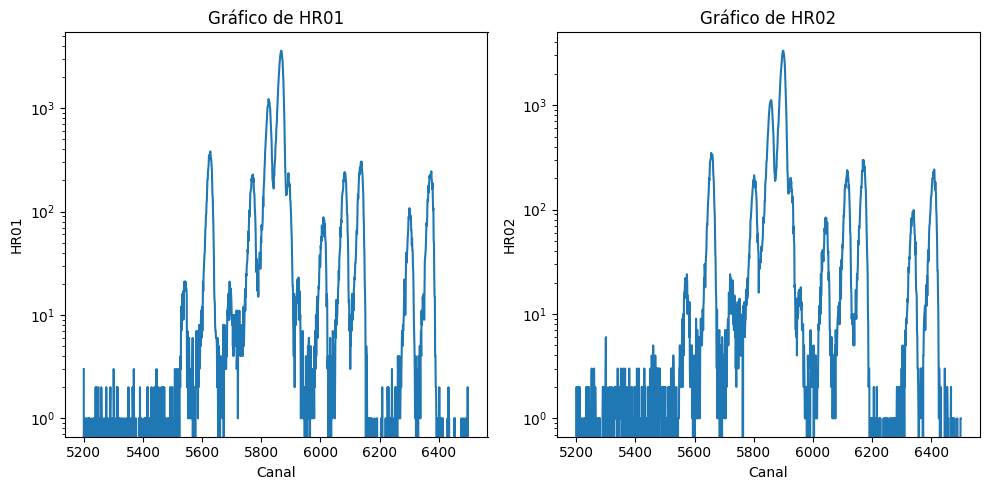

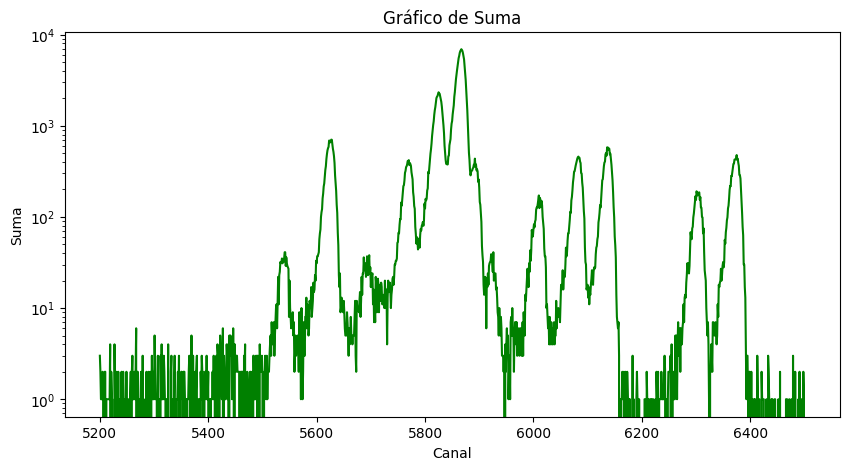

In [2]:
# Seleccionar las columnas HR01, HR02 y Suma
df_selected = df[['HR01', 'HR02', 'Suma']]

# Definir el rango deseado en el eje X
inicio = 5200
fin = 6500

# Filtrar el DataFrame para incluir solo las filas dentro del rango
df_selected = df_selected[(df_selected.index >= inicio) & (df_selected.index <= fin)]

# Graficar HR01 y HR02 en un eje X separado
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(df_selected.index, df_selected['HR01'])
plt.xlabel('Canal')
plt.ylabel('HR01')
plt.title('Gráfico de HR01')
plt.yscale('log')

plt.subplot(1, 2, 2)
plt.plot(df_selected.index, df_selected['HR02'])
plt.xlabel('Canal')
plt.ylabel('HR02')
plt.title('Gráfico de HR02')
plt.yscale('log')

plt.tight_layout()

# Graficar Suma en un eje X separado
plt.figure(figsize=(10, 5))
plt.plot(df_selected.index, df_selected['Suma'], color='green')
plt.xlabel('Canal')
plt.ylabel('Suma')
plt.title('Gráfico de Suma')
plt.yscale('log')

plt.show()

In [106]:
df_penhan = pd.read_csv('/content/chspect.dat',
                   delim_whitespace=True,
                   skiprows=5, names=['Deposited Energy (eV)',
                          'Probability Density (1/(eV*particle))'])

In [108]:
df_penhan_U235 = df_penhan[(df_penhan['Deposited Energy (eV)'] >= 4.1E6) & (df_penhan['Deposited Energy (eV)'] <= 4.61E6)].copy()
df_penhan_U235.loc[:, 'Probability Density (1/(eV*particle))'] *= 0.95

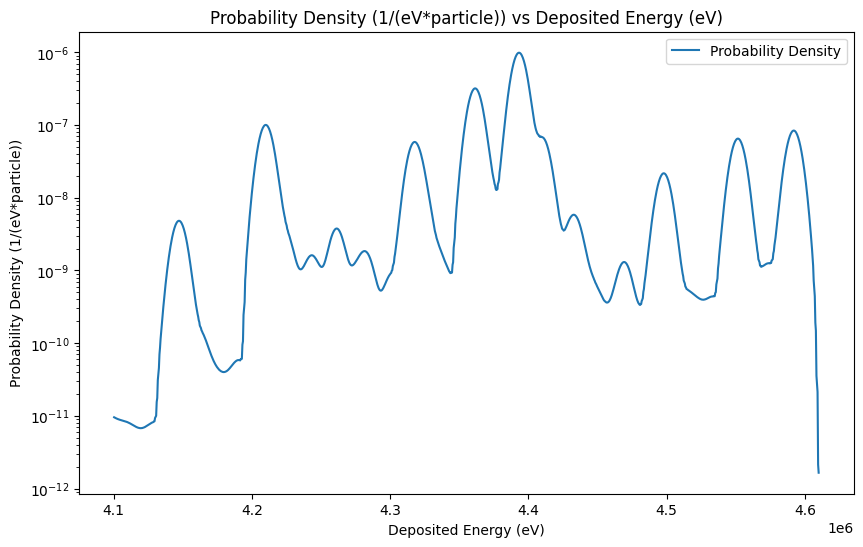

In [109]:
plt.figure(figsize=(10, 6))
plt.plot(df_penhan_U235['Deposited Energy (eV)'], df_penhan_U235['Probability Density (1/(eV*particle))'], label='Probability Density')
plt.xlabel('Deposited Energy (eV)')
plt.ylabel('Probability Density (1/(eV*particle))')
plt.title('Probability Density (1/(eV*particle))' + ' vs Deposited Energy (eV)')
plt.yscale('log')
plt.legend()
plt.show()

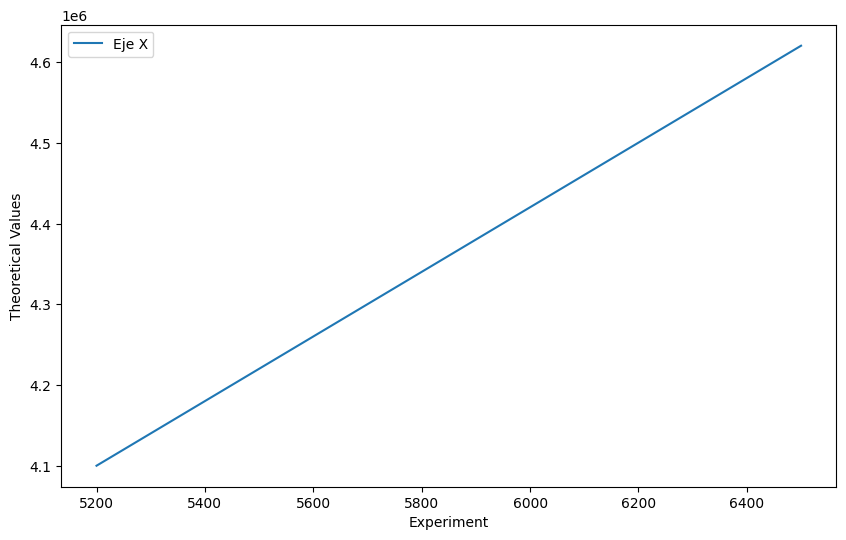

In [62]:
plt.figure(figsize=(10, 6))
plt.plot(df_selected.index, df_penhan['Deposited Energy (eV)'].values[:len(df_selected.index)], label='Eje X')
plt.xlabel('Experiment')
plt.ylabel('Theoretical Values')
plt.legend()
plt.show()

In [66]:
from scipy import stats

# Realizar la regresión lineal
slope, intercept, r_value, p_value, std_err = stats.linregress(df_selected.index, df_penhan['Deposited Energy (eV)'].values[:len(df_selected.index)])

# Usar la pendiente y la intersección para calcular los valores ajustados de y
df_selected['Index Predicted'] = intercept + slope * df_selected.index

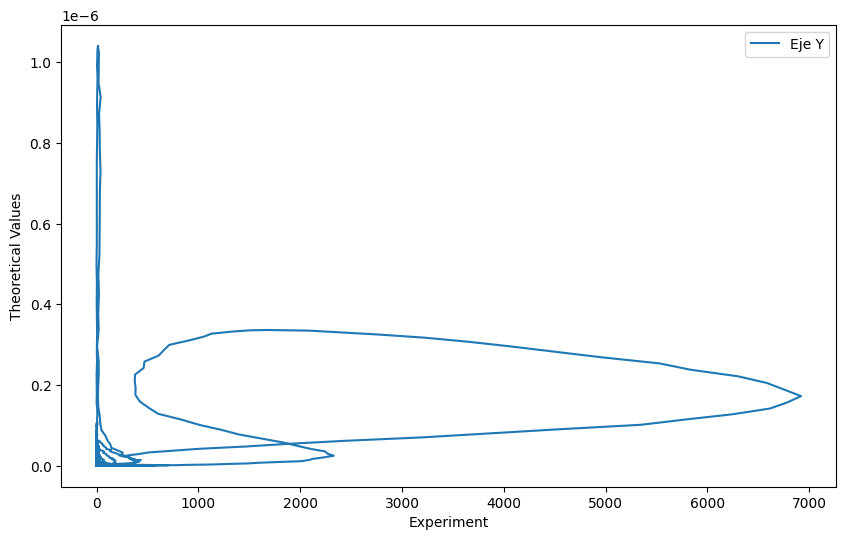

In [63]:
plt.figure(figsize=(10, 6))
plt.plot(df_selected['Suma'], df_penhan['Probability Density (1/(eV*particle))'].values[:len(df_selected.index)], label='Eje Y')
plt.xlabel('Experiment')
plt.ylabel('Theoretical Values')
plt.legend()
plt.show()